In [352]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Load the input_train data
input_train = pd.read_csv('input_train.csv')

input_train['binaryClass'] = input_train['binaryClass'].astype('category').cat.codes.values
input_train['pregnant'] = input_train['pregnant'].astype('category').cat.codes.values

input_train= input_train.drop('I131 treatment', axis=1)



In [353]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def remove_outliers_rows(df, z_threshold=3, target_column=None):
    """
    Remove rows with outliers from a DataFrame.

    Parameters:
    - df (DataFrame): Input DataFrame.
    - z_threshold (float): Z-score threshold for outlier detection. Defaults to 3.
    - target_column (str): Name of the target label column to exclude from outlier removal. Defaults to None.

    Returns:
    - DataFrame: DataFrame with rows containing outliers removed.
    """
    df_copy = df.copy()  # Create a copy of the DataFrame
    for column in df_copy.columns:
        if column == target_column:
            continue  # Skip outlier removal for the target class column
        
        # Convert column values to numeric, ignoring non-numeric values like '?'
        df_copy[column] = pd.to_numeric(df_copy[column], errors='coerce')
        
        # Calculate z-scores for the column values
        z_scores = zscore(df_copy[column])
        
        # Find indices of rows with z-score beyond the threshold
        outlier_indices = np.where(np.abs(z_scores) >= z_threshold)[0]
        
        # Drop rows with outliers
        df_copy = df_copy.drop(outlier_indices)
    
    return df_copy

# Example usage:
# Assuming df is your DataFrame and 'target_label_column' is the name of the target label column
input_train = remove_outliers_rows(input_train, target_column='binaryClass')


In [354]:
input_train.describe(include='all')

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
count,2786.000000,2662.000000,2356.000000,2681.000000,2660.000000,2969.0,2969.000000
mean,107.133955,110.049850,1.988514,5.231013,0.986069,0.0,0.921522
std,33.785153,31.619954,0.787786,25.017009,0.181536,0.0,0.268967
min,2.000000,2.000000,0.050000,0.005000,0.250000,0.0,0.000000
25%,87.000000,93.000000,1.600000,0.500000,0.870000,0.0,1.000000
50%,103.000000,107.000000,2.000000,1.400000,0.970000,0.0,1.000000
75%,123.750000,124.000000,2.300000,2.700000,1.080000,0.0,1.000000
max,372.000000,312.000000,8.500000,530.000000,2.320000,0.0,1.000000


In [355]:
def impute_missing_with_means(dataset, column, binary_class):
    mean_1 = dataset[column].loc[(dataset[column] != '?') & (dataset['binaryClass'] == 1)].astype(float).mean().round(2)
    mean_0 = dataset[column].loc[(dataset[column] != '?') & (dataset['binaryClass'] == 0)].astype(float).mean().round(2)
    dataset.loc[(dataset[column] == '?') & (dataset['binaryClass'] == 0), column] = mean_0
    dataset.loc[(dataset[column] == '?') & (dataset['binaryClass'] == 1), column] = mean_1
   
columns_to_impute = ['TT4', 'FTI', 'T3', 'TSH', 'T4U']


for column in columns_to_impute:
    impute_missing_with_means(input_train, column, 'binaryClass')


In [356]:
input_train.describe(include='all')

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
count,2786.000000,2662.000000,2356.000000,2681.000000,2660.000000,2969.0,2969.000000
mean,107.133955,110.049850,1.988514,5.231013,0.986069,0.0,0.921522
std,33.785153,31.619954,0.787786,25.017009,0.181536,0.0,0.268967
min,2.000000,2.000000,0.050000,0.005000,0.250000,0.0,0.000000
25%,87.000000,93.000000,1.600000,0.500000,0.870000,0.0,1.000000
50%,103.000000,107.000000,2.000000,1.400000,0.970000,0.0,1.000000
75%,123.750000,124.000000,2.300000,2.700000,1.080000,0.0,1.000000
max,372.000000,312.000000,8.500000,530.000000,2.320000,0.0,1.000000


In [357]:
input_train.head(20)

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
0,46.0,79.0,0.3,0.880,0.58,0,1
1,165.0,184.0,2.5,0.400,0.90,0,1
2,136.0,114.0,2.6,0.600,1.19,0,1
3,122.0,108.0,NaN,2.400,1.12,0,1
4,121.0,104.0,2.7,2.700,1.17,0,1
5,103.0,95.0,NaN,0.005,1.08,0,1
6,109.0,118.0,1.8,0.770,0.92,0,1
7,91.0,82.0,1.8,5.100,1.12,0,1
8,118.0,83.0,2.9,0.430,1.42,0,1
9,117.0,107.0,NaN,2.100,1.09,0,1


In [358]:
input_train = input_train.dropna()

In [359]:
input_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, 0 to 3016
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TT4          2162 non-null   float64
 1   FTI          2162 non-null   float64
 2   T3           2162 non-null   float64
 3   TSH          2162 non-null   float64
 4   T4U          2162 non-null   float64
 5   pregnant     2162 non-null   int8   
 6   binaryClass  2162 non-null   int8   
dtypes: float64(5), int8(2)
memory usage: 105.6 KB


In [360]:
input_train[input_train=='?'].count()

TT4            0
FTI            0
T3             0
TSH            0
T4U            0
pregnant       0
binaryClass    0
dtype: int64

In [361]:
input_train.dropna()
input_train.drop_duplicates()

,TT4,FTI,T3,TSH,T4U,pregnant,binaryClass
0,46.0,79.0,0.3,0.88,0.58,0,1
1,165.0,184.0,2.5,0.40,0.90,0,1
2,136.0,114.0,2.6,0.60,1.19,0,1
4,121.0,104.0,2.7,2.70,1.17,0,1
6,109.0,118.0,1.8,0.77,0.92,0,1
...,...,...,...,...,...,...,...
3011,90.0,99.0,2.3,2.50,0.91,0,1
3012,113.0,124.0,2.3,0.47,0.91,0,1
3013,110.0,101.0,2.7,2.40,1.09,0,1
3015,128.0,129.0,1.6,0.50,0.99,0,1


In [362]:
input_train['binaryClass'].value_counts()

binaryClass
1    1979
0     183
Name: count, dtype: int64

In [363]:
# Create the SMOTE object
smote = SMOTE()

# Apply SMOTE to balance the data
X_resampled, y_resampled = smote.fit_resample(input_train.drop('binaryClass', axis=1), input_train['binaryClass'])

# Create a new balanced dataframe
balanced_data = pd.DataFrame(X_resampled, columns=input_train.drop('binaryClass', axis=1).columns)
balanced_data['binaryClass'] = y_resampled


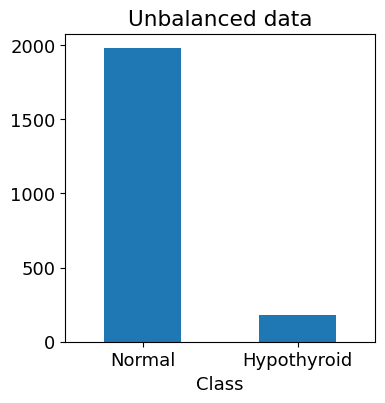

In [364]:
plt.rcParams.update({'font.size': 13})
# include figure 
plt.figure(figsize=(4, 4))
input_train['binaryClass'].value_counts().plot(kind='bar', title='Count (output)')
plt.xlabel('Class')
plt.title('Unbalanced data')
plt.xticks([0, 1], ['Normal', 'Hypothyroid'], rotation=0)
# save fig eps format
fig = plt.gcf()
#fig.savefig('unbalanced_data.eps', format='eps', dpi=600, bbox_inches='tight')

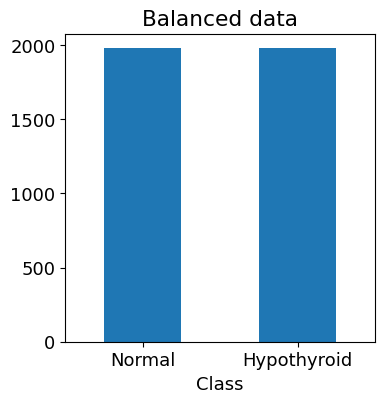

In [365]:
plt.rcParams.update({'font.size': 13})
# include figure 
plt.figure(figsize=(4, 4))
balanced_data['binaryClass'].value_counts().plot(kind='bar', title='Count (output)')
plt.xlabel('Class')
plt.title('Balanced data')
plt.xticks([0, 1], ['Normal', 'Hypothyroid'], rotation=0)
# save fig eps format
fig = plt.gcf()
#fig.savefig('unbalanced_data.eps', format='eps', dpi=600, bbox_inches='tight')

In [366]:
input_train[['TT4', 'FTI', 'T3', 'TSH', 'T4U']].describe()

,TT4,FTI,T3,TSH,T4U
count,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000
mean,106.876827,109.454070,1.982396,5.229059,0.985640
std,34.129506,31.830897,0.788302,25.277576,0.181562
min,2.000000,2.000000,0.050000,0.005000,0.250000
25%,87.000000,93.000000,1.500000,0.500000,0.870000
50%,103.000000,107.000000,2.000000,1.400000,0.970000
75%,123.000000,124.000000,2.300000,2.600000,1.080000
max,372.000000,312.000000,8.500000,530.000000,2.120000


In [367]:
balanced_data[['TT4', 'FTI', 'T3', 'TSH', 'T4U']].describe()


,TT4,FTI,T3,TSH,T4U
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,89.676722,91.453483,1.744915,20.764729,0.993646
std,39.276976,38.278063,0.778129,51.079545,0.170672
min,2.000000,2.000000,0.050000,0.005000,0.250000
25%,67.773332,71.740769,1.300000,1.200000,0.882384
50%,90.270152,95.000000,1.800000,6.365073,0.995432
75%,113.000000,113.679518,2.200000,14.335380,1.090000
max,372.000000,312.000000,8.500000,530.000000,2.120000


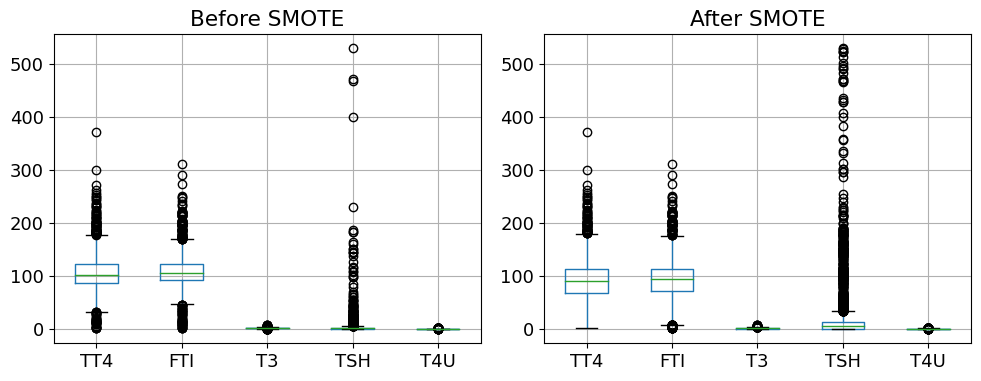

In [369]:

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot boxplot of features before SMOTE
input_train__plot = input_train[['TT4', 'FTI', 'T3', 'TSH', 'T4U']]
input_train__plot.boxplot(ax=axes[0])
axes[0].set_title('Before SMOTE')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot boxplot of features after SMOTE
input_train_plot = balanced_data[['TT4', 'FTI', 'T3', 'TSH', 'T4U']]
input_train_plot.boxplot(ax=axes[1])
axes[1].set_title('After SMOTE')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()
